In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing

from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

import sklearn.metrics as metrics

In [3]:
df =  pd.read_csv('data1year.csv')
df_test = pd.read_csv('Sep_test_new.csv',encoding='cp1252')

In [4]:
df.columns = [c.replace(' ','_') for c in df.columns]

In [5]:
df.head()

,Target,Hiretype,Title,age,Original_State,Source,IT,Joining_Center,Joining_center_1,Rank,IsRotationalShift,NoticePeriod,Qualification1,Big_four,DAndI,hike,JoiningBonus,GoodsTransportationTravelEligibility,Experienced
0,1,New Employee,1,33.931507,Karnataka,EMPLOYEE REFERRAL,0,Bangalore,Same,42,False,2,Grad,1,0,33%,0,0,1
1,1,New Employee,1,38.720548,Karnataka,PORTAL,0,Bangalore,Same,32,False,2,CA,0,0,31%,0,0,1
2,1,New Employee,1,29.597260,Karnataka,EMPLOYEE REFERRAL,1,Bangalore,Same,42,False,2,Grad,0,0,36%,0,0,1
3,1,New Employee,0,31.282192,New Delhi,CONSULTANCY,0,Gurgaon,Same,42,False,2,Post Grad,1,0,36%,0,0,1
4,1,New Employee,1,32.443836,Karnataka,EMPLOYEE REFERRAL,0,Kochi,Not_same,42,True,2,Post Grad,0,0,23%,0,0,1


In [6]:
#Use label encoder to convert categorical variables to one-hot encoding (dummy variables)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3986 entries, 0 to 3985
Data columns (total 19 columns):
Target                                  3986 non-null int64
Hiretype                                3986 non-null object
Title                                   3986 non-null int64
age                                     3986 non-null float64
Original_State                          3986 non-null object
Source                                  3986 non-null object
IT                                      3986 non-null int64
Joining_Center                          3986 non-null object
Joining_center_1                        3986 non-null object
Rank                                    3986 non-null int64
IsRotationalShift                       3986 non-null bool
NoticePeriod                            3986 non-null int64
Qualification1                          3986 non-null object
Big_four                                3986 non-null int64
DAndI                                   3986 n

In [8]:
df['Hiretype'] = le.fit_transform(df['Hiretype'])
df['Original_State'] = le.fit_transform(df['Original_State'])
#df['PinCode'] = le.fit_transform(df['PinCode'])
df['Source'] = le.fit_transform(df['Source'])
df['Joining_Center'] = le.fit_transform(df['Joining_Center'])
df['Joining_center_1'] = le.fit_transform(df['Joining_center_1'])
df['Rank'] = le.fit_transform(df['Rank'])

df['IsRotationalShift'] = le.fit_transform(df['IsRotationalShift'])
df['Qualification1'] = le.fit_transform(df['Qualification1'])


In [9]:
df.drop('Joining_Center',axis=1,inplace=True)

In [10]:
df.drop('Original_State',axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3986 entries, 0 to 3985
Data columns (total 17 columns):
Target                                  3986 non-null int64
Hiretype                                3986 non-null int32
Title                                   3986 non-null int64
age                                     3986 non-null float64
Source                                  3986 non-null int32
IT                                      3986 non-null int64
Joining_center_1                        3986 non-null int32
Rank                                    3986 non-null int64
IsRotationalShift                       3986 non-null int64
NoticePeriod                            3986 non-null int64
Qualification1                          3986 non-null int32
Big_four                                3986 non-null int64
DAndI                                   3986 non-null int64
hike                                    3986 non-null object
JoiningBonus                            3986 non-n

In [12]:
df.Hiretype = df.Hiretype.astype('category')

df.Source = df.Source.astype('category')
df.Joining_center_1 = df.Joining_center_1.astype('category')

df.Rank = df.Rank.astype('category')
df.IsRotationalShift = df.IsRotationalShift.astype('category')
df.Qualification1 = df.Qualification1.astype('category')
df.Target = df.Target.astype('category')
df.Title = df.Title.astype('category')
df.IT = df.IT.astype('category')
df.NoticePeriod = df.NoticePeriod.astype('category')
df.Big_four = df.Big_four.astype('category')
df.DAndI = df.DAndI.astype('category')
df['hike'] = df.hike.str.replace('%', '')
df['hike'] = df['hike'].astype(str).astype(int)
df.JoiningBonus = df.JoiningBonus.astype('category')
df.GoodsTransportationTravelEligibility = df.GoodsTransportationTravelEligibility.astype('category')
df.Experienced = df.Experienced.astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3986 entries, 0 to 3985
Data columns (total 17 columns):
Target                                  3986 non-null category
Hiretype                                3986 non-null category
Title                                   3986 non-null category
age                                     3986 non-null float64
Source                                  3986 non-null category
IT                                      3986 non-null category
Joining_center_1                        3986 non-null category
Rank                                    3986 non-null category
IsRotationalShift                       3986 non-null category
NoticePeriod                            3986 non-null category
Qualification1                          3986 non-null category
Big_four                                3986 non-null category
DAndI                                   3986 non-null category
hike                                    3986 non-null int32
JoiningBonus   

In [14]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Target,3986.0,2.0,1.0,2628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hiretype,3986.0,3.0,0.0,3632.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Title,3986.0,2.0,1.0,2133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,3986.0,NaN,NaN,NaN,27.810609,4.533026,19.476712,24.367808,27.221918,30.364384,50.438356
Source,3986.0,7.0,2.0,1504.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IT,3986.0,2.0,0.0,3495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Joining_center_1,3986.0,2.0,1.0,2914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rank,3986.0,4.0,3.0,2258.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IsRotationalShift,3986.0,2.0,0.0,3930.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NoticePeriod,3986.0,2.0,2.0,3776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
pd.crosstab(df.Target,df.Experienced)

Experienced,0,1
Target,,
0,56,1302
1,180,2448


In [16]:
df.Target.value_counts()
# 0 is Not joined
# 1 is joined

1    2628
0    1358
Name: Target, dtype: int64

In [17]:
import seaborn as sns 

In [18]:
#sns_plot = sns.pairplot(df,diag_kind = "kde", hue = "Target")
#sns_plot.savefig("output.png")

In [19]:
df.corr()

,age,hike
age,1.000000,-0.531322
hike,-0.531322,1.000000


In [20]:
pca = PCA(n_components=2)

In [21]:
X = df.drop('Target',axis=1)

In [22]:
y = df.Target

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [24]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_class_logreg = logreg.predict(X_test)

C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
print("Logreg ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_logreg))
print('Logreg CLASSIFIER CONFUSTION MATRIX:',metrics.confusion_matrix(y_test,y_pred_class_logreg))

print("===> **Logreg Recall SCORE",metrics.recall_score(y_test, y_pred_class_logreg,average=None))
print("===> **Logreg F1 SCORE",metrics.f1_score(y_test, y_pred_class_logreg,average=None))
print("===> **Logreg Precision SCORE",metrics.precision_score(y_test, y_pred_class_logreg,average=None))
print("===> **Logreg ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_logreg,average=None))

Logreg ACCURACY: 0.6981605351170569
Logreg CLASSIFIER CONFUSTION MATRIX: [[189 222]
 [139 646]]
===> **Logreg Recall SCORE [0.45985401 0.82292994]
===> **Logreg F1 SCORE [0.51150203 0.7816092 ]
===> **Logreg Precision SCORE [0.57621951 0.74423963]
===> **Logreg ROC_AUC SCORE 0.6413919754521363


In [26]:
X_train.columns

Index(['Hiretype', 'Title', 'age', 'Source', 'IT', 'Joining_center_1', 'Rank',
       'IsRotationalShift', 'NoticePeriod', 'Qualification1', 'Big_four',
       'DAndI', 'hike', 'JoiningBonus', 'GoodsTransportationTravelEligibility',
       'Experienced'],
      dtype='object')

In [27]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
y_pred_tree = classifier.predict(X_test)

In [28]:
print("Dtree ACCURACY:",metrics.accuracy_score(y_test,y_pred_tree))
print('Dtree CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_tree))
print("===> **Dtree F1 SCORE",metrics.f1_score(y_test, y_pred_tree,average=None))
print("===> **Dtree Recall SCORE",metrics.recall_score(y_test, y_pred_tree,average=None))
print("===> **Dtree Precision SCORE",metrics.precision_score(y_test, y_pred_tree,average=None))
print("===> **Dtree ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_tree,average=None))

Dtree ACCURACY: 0.7892976588628763
Dtree CLASSIFIER CONFUSTION MATRIX: col_0     0    1
Target          
0       325   86
1       166  619
===> **Dtree F1 SCORE [0.72062084 0.83087248]
===> **Dtree Recall SCORE [0.79075426 0.78853503]
===> **Dtree Precision SCORE [0.66191446 0.87801418]
===> **Dtree ROC_AUC SCORE 0.7896446448773382


In [29]:
feature_cols = X.columns

In [30]:
## Calculating feature importance

feat_importance = classifier.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, classifier.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
age,0.473900
hike,0.191848
Big_four,0.067288
Source,0.050838
Hiretype,0.041318
Title,0.032735
GoodsTransportationTravelEligibility,0.029370
Qualification1,0.023267
IT,0.023195
Joining_center_1,0.022268


In [31]:
age	0.475813
hike	0.197247
Big_four	0.052102
Source	0.047120
Title	0.044560
Hiretype	0.043575
Rank	0.031784
Joining_center_1	0.027623
GoodsTransportationTravelEligibility	0.026847
Qualification1	0.025318
IT	0.020334
Experienced	0.003219
JoiningBonus	0.002659
NoticePeriod	0.001798
IsRotationalShift	0.000000
DAndI	0.000000

SyntaxError: invalid syntax (<ipython-input-31-eb80c1f88438>, line 1)

In [35]:
X1 = X[['age','hike','Big_four','Source','Title','Hiretype','Rank','Joining_center_1','GoodsTransportationTravelEligibility',
        'Qualification1','IT','Experienced']]

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [39]:
X_train_transform = scaler.fit_transform(X_train)

In [40]:
X_test_transform = scaler.fit_transform(X_test)

In [41]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=100)
classifier.fit(X_train,y_train)
y_pred_tree = classifier.predict(X_test)

In [42]:
print("Dtree ACCURACY:",metrics.accuracy_score(y_test,y_pred_tree))
print('Dtree CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_tree))
print("===> **Dtree F1 SCORE",metrics.f1_score(y_test, y_pred_tree,average=None))
print("===> **Dtree Recall SCORE",metrics.recall_score(y_test, y_pred_tree,average=None))
print("===> **Dtree Precision SCORE",metrics.precision_score(y_test, y_pred_tree,average=None))
print("===> **Dtree ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_tree,average=None))

Dtree ACCURACY: 0.7976588628762542
Dtree CLASSIFIER CONFUSTION MATRIX: col_0     0    1
Target          
0       333   78
1       164  621
===> **Dtree F1 SCORE [0.73348018 0.83692722]
===> **Dtree Recall SCORE [0.81021898 0.7910828 ]
===> **Dtree Precision SCORE [0.67002012 0.88841202]
===> **Dtree ROC_AUC SCORE 0.8006508903249803


In [43]:
logreg = LogisticRegression(solver='liblinear',C=3)
logreg.fit(X_train,y_train)
y_pred_class_logreg = logreg.predict(X_test)

In [44]:
print("Logreg ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_logreg))
print('Logreg CLASSIFIER CONFUSTION MATRIX:',metrics.confusion_matrix(y_test,y_pred_class_logreg))

print("===> **Logreg Recall SCORE",metrics.recall_score(y_test, y_pred_class_logreg,average=None))
print("===> **Logreg F1 SCORE",metrics.f1_score(y_test, y_pred_class_logreg,average=None))
print("===> **Logreg Precision SCORE",metrics.precision_score(y_test, y_pred_class_logreg,average=None))
print("===> **Logreg ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_logreg,average=None))

Logreg ACCURACY: 0.6964882943143813
Logreg CLASSIFIER CONFUSTION MATRIX: [[191 220]
 [143 642]]
===> **Logreg Recall SCORE [0.46472019 0.81783439]
===> **Logreg F1 SCORE [0.51275168 0.77959927]
===> **Logreg Precision SCORE [0.57185629 0.74477958]
===> **Logreg ROC_AUC SCORE 0.6412772947758303


In [45]:
error_tr = []
error_ts = []
# Calculating error for K values for 5, 13 and 21
for i in range(1,49):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i1 = knn.predict(X_train)
    pred_i = knn.predict(X_test)
    error_ts.append(np.mean(pred_i != y_test))
    error_tr.append(np.mean(pred_i1 != y_train))

<IPython.core.display.Javascript object>


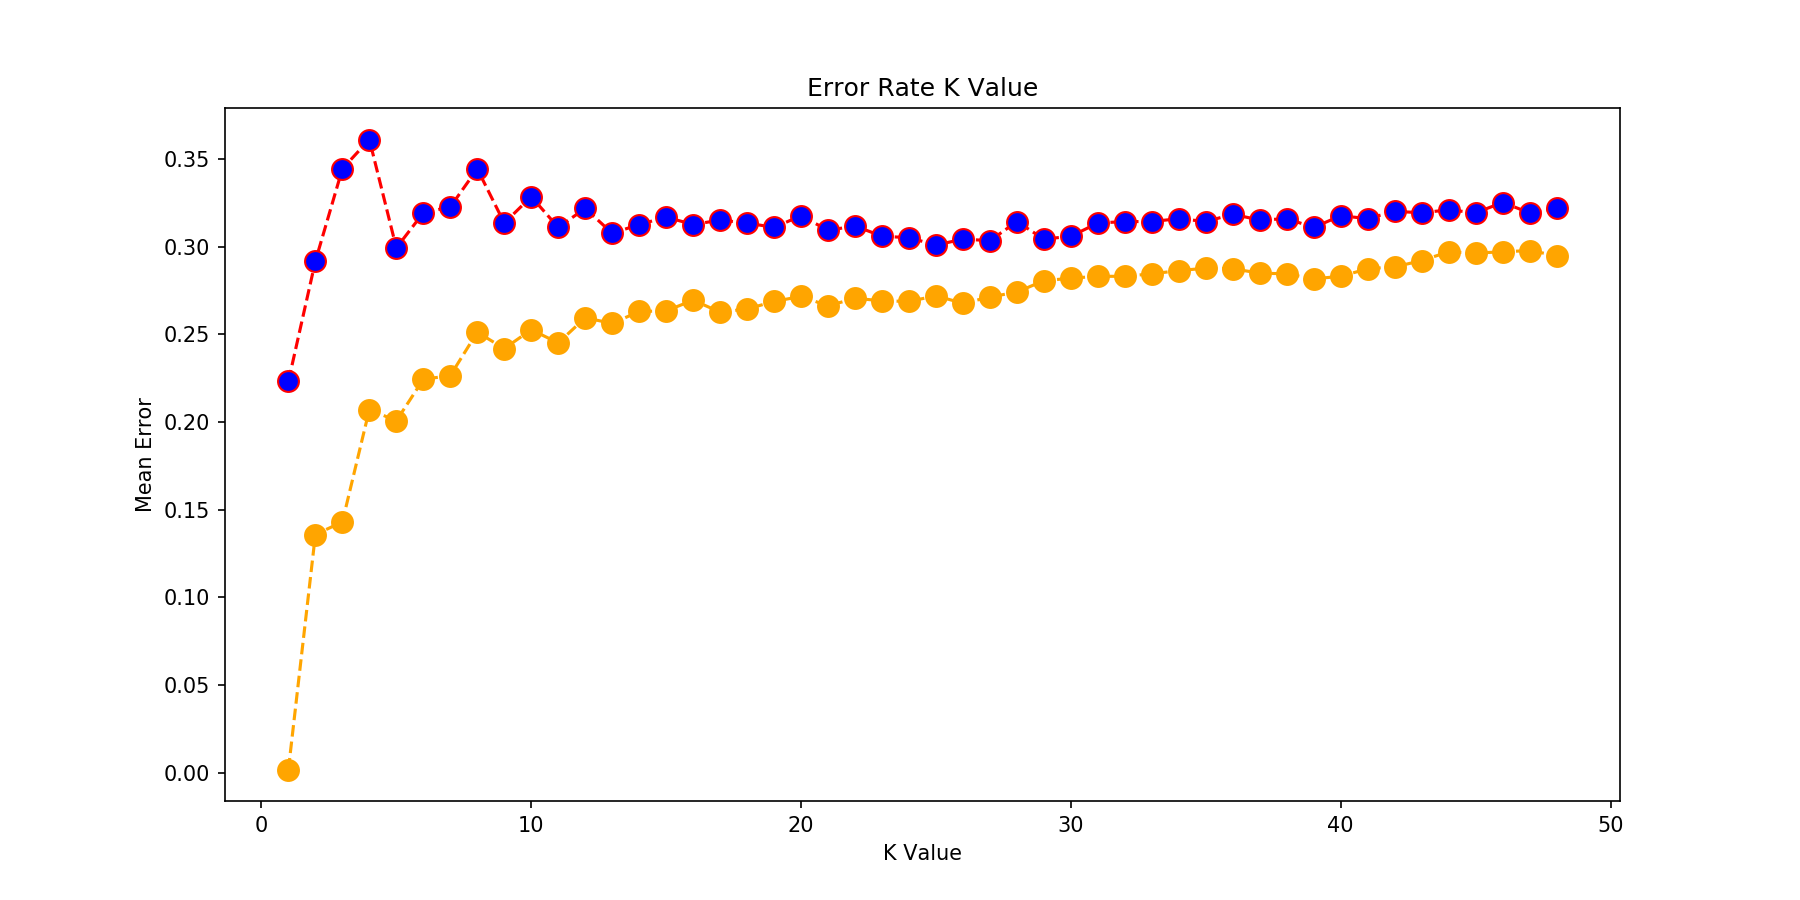

Text(0,0.5,'Mean Error')

In [52]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1,49), error_ts, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.plot(range(1,49), error_tr, color='orange', linestyle='dashed', marker='o',  
         markerfacecolor='orange', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_class_knn = knn.predict(X_test)

In [54]:
print("KNN ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_knn))
print('KNN CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_knn))
print("===> **KNN F1 SCORE",metrics.f1_score(y_test, y_pred_class_knn,average=None))
print("===> **KNN Recall SCORE",metrics.recall_score(y_test, y_pred_class_knn,average=None))
print("===> **KNN Precision SCORE",metrics.precision_score(y_test, y_pred_class_knn,average=None))
print("===> **KNN ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_knn,average=None))
print("##################################################################################################")

KNN ACCURACY: 0.7006688963210702
KNN CLASSIFIER CONFUSTION MATRIX: col_0     0    1
Target          
0       222  189
1       169  616
===> **KNN F1 SCORE [0.55361596 0.77484277]
===> **KNN Recall SCORE [0.54014599 0.78471338]
===> **KNN Precision SCORE [0.56777494 0.76521739]
===> **KNN ROC_AUC SCORE 0.6624296805988191
##################################################################################################


In [86]:
from sklearn.svm import SVC
svcclassifier = SVC(random_state=0,C=8,class_weight={0:.7,1:.3})
svcclassifier.fit(X_train,y_train)
y_pred_svm = svcclassifier.predict(X_test)

C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [87]:
print("SVM ACCURACY:",metrics.accuracy_score(y_test,y_pred_svm))
print('SVM CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_svm))
print("===> **SVM F1 SCORE",metrics.f1_score(y_test, y_pred_svm,average=None))
print("===> **SVM Recall SCORE",metrics.recall_score(y_test, y_pred_svm,average=None))
print("===> **SVM Precision SCORE",metrics.precision_score(y_test, y_pred_svm,average=None))
print("===> **SVM ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_svm,average=None))

SVM ACCURACY: 0.6981605351170569
SVM CLASSIFIER CONFUSTION MATRIX: col_0     0    1
Target          
0       295  116
1       245  540
===> **SVM F1 SCORE [0.62039958 0.74947953]
===> **SVM Recall SCORE [0.71776156 0.68789809]
===> **SVM Precision SCORE [0.5462963  0.82317073]
===> **SVM ROC_AUC SCORE 0.7028298231747949


In [90]:
cross_val_score(svcclassifier,X_train,y_train,cv=10,scoring='f1')

C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning

array([0.7277937 , 0.75362319, 0.75820896, 0.7816092 , 0.78651685,
       0.8       , 0.77746479, 0.75075075, 0.7696793 , 0.79083095])

In [59]:
nb = MultinomialNB()
#nb.fit(X_train_transform,y_train)
#y_pred_class_nb = nb.predict(X_test_transform)

In [ ]:
print("NaiveBayes ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_nb))
print('NaiveBayes CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_nb))
print("===> **NaiveBayes F1 SCORE",metrics.f1_score(y_test, y_pred_class_nb,average=None))
print("===> **NaiveBayes Recall SCORE",metrics.recall_score(y_test, y_pred_class_nb,average=None))
print("===> **NaiveBayes Precision SCORE",metrics.precision_score(y_test, y_pred_class_nb,average=None))
print("===> **NaiveBayes ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_nb,average=None))

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.3, max_depth=10)
gbcl = gbcl.fit(X_train, y_train)

In [93]:
y_pred_gbcl = gbcl.predict(X_test)

In [94]:
print("GBC: ACCURACY:",metrics.accuracy_score(y_test,y_pred_gbcl))
print('GBC CLASSIFIER CONFUSTION MATRIX:%\n',pd.crosstab(y_test,y_pred_gbcl))
print("===> **GBC F1 SCORE",metrics.f1_score(y_test, y_pred_gbcl,average=None))
print("===> **GBC Recall SCORE",metrics.recall_score(y_test, y_pred_gbcl,average=None))
print("===> **GBC Precision SCORE",metrics.precision_score(y_test, y_pred_gbcl,average=None))
print("===> **GBC ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_gbcl,average=None))

GBC: ACCURACY: 0.8043478260869565
GBC CLASSIFIER CONFUSTION MATRIX:%
 col_0     0    1
Target          
0       323   88
1       146  639
===> **GBC F1 SCORE [0.73409091 0.8452381 ]
===> **GBC Recall SCORE [0.78588808 0.81401274]
===> **GBC Precision SCORE [0.68869936 0.87895461]
===> **GBC ROC_AUC SCORE 0.799950408356192


In [96]:
X_train.columns

Index(['Hiretype', 'Title', 'age', 'Source', 'IT', 'Joining_center_1', 'Rank',
       'IsRotationalShift', 'NoticePeriod', 'Qualification1', 'Big_four',
       'DAndI', 'hike', 'JoiningBonus', 'GoodsTransportationTravelEligibility',
       'Experienced'],
      dtype='object')

In [95]:
df_test

,Hiretype,Title,Age,Source,Joining_Center,IsRotationalShift,Qualification,DAndI,Stipend,EmploymentDurationInMonths,...,Hike,Experienced,Joining_Center.1,Rank,IsRotationalShift.1,IT,Big_four,Qualification1,IsNoticePeriodReimbursementProvided,Final_Status
0,Transfer,Mr,27,GDS LEAP,Bangalore,False,E MBA,FALSE,0,0.0,...,0%,1,Bangalore,44,False,0,1,MBA,0,1
1,New Employee,Ms,31,PORTAL,Bangalore,False,B.Com,NaN,0,0.0,...,57%,1,Bangalore,42,False,0,1,Grad,0,1
2,New Employee,Mr,35,EMPLOYEE REFERRAL,Bangalore,False,B.Tech (ECE),FALSE,0,0.0,...,1%,1,Bangalore,42,False,1,0,Grad,0,0
3,New Employee,Ms,29,EMPLOYEE REFERRAL,Gurgaon,False,MBA,FALSE,0,0.0,...,18%,1,Gurgaon,42,False,0,0,MBA,0,0
4,New Employee,Mr,33,CONSULTANCY,Gurgaon,False,MBA,FALSE,0,0.0,...,32%,1,Gurgaon,42,False,0,0,MBA,0,0
5,Transfer,Mr,40,GDS LEAP,Bangalore,False,B.Com,FALSE,0,0.0,...,0%,1,Bangalore,42,False,0,1,Grad,0,1
6,New Employee,Mr,27,CONSULTANCY,Bangalore,False,PGDM,NaN,0,0.0,...,25%,1,Bangalore,44,False,0,1,Post Grad,0,1
7,New Employee,Mr,35,CONSULTANCY,Bangalore,False,B.Tech,NaN,0,0.0,...,64%,1,Bangalore,32,False,1,0,Grad,0,1
8,New Employee,Mr,30,PORTAL,Bangalore,False,BBA,FALSE,0,0.0,...,25%,1,Bangalore,42,False,0,0,Grad,0,0
9,New Employee,Mr,35,CONSULTANCY,Bangalore,False,PGDM,FALSE,0,0.0,...,21%,1,Bangalore,42,False,0,1,Post Grad,0,0
